In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 1a

Normal distribution with mean = 0 and SD = 1mm <br> step (x, y) per second so over course of 1 hour = 3600 steps

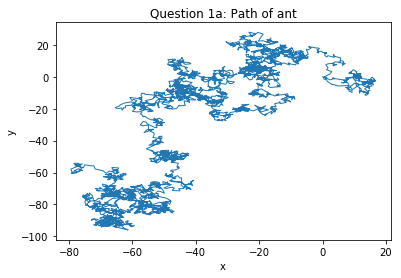

In [3]:
x = 0
y = 0
ax=[]
ay=[]
for i in range(3600):
    ax.append(x)
    ay.append(y)
    x = x + np.random.normal(0,1)
    y = y + np.random.normal(0,1)
    
plt.plot(ax, ay, linewidth =1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Question 1a: Path of ant')
plt.show()

# Question 1b

probability that ant comes 5mm near the nest in the next hour after finding food

In [48]:
N = 10000
prob = 0
for i in range(N):
    x, y = 0, 0
    ax=[]
    ay=[]
    for j in range(3600):
        ax.append(x)
        ay.append(y)
        x = x + np.random.normal(0,1)
        y = y + np.random.normal(0,1)
    reverseax=[]
    reverseay=[]
    reverseax.append(ax[-1])
    reverseay.append(ay[-1])
    newx= ax[-1]
    newy= ay[-1]
    for i in range(3600):
        newx = newx + np.random.normal(0,1)
        newy = newy + np.random.normal(0,1)
        reverseax.append(newx)
        reverseay.append(newy)
        dist = pow(newx**2+newy**2, 0.5)
        if dist < 5:
            prob += 1
            break
print((prob/N)*100)   

15.39


I needed to run 10000 simulations and the result show that this strategy is not very good because it is not efficient. It would take an hour to go back home and even though, the chances the ant successfully reaches its destination is only ~15%.

# Question 1c

In [25]:
N=10000
prob = 0
avg_dist = []
for i in range(N):
    x = 0
    y = 0
    ax = []
    ay = []
    dist = []
    for i in range(3600):
        ax.append(x)
        ay.append(y)
        x = x + np.random.normal(0,1)
        y = y + np.random.normal(0,1)
    reversex=[]
    reversey=[]
    reversex.append(ax[-1])
    reversey.append(ay[-1])
    newx = ax[-1]
    newy = ay[-1]
    for i in range(3600):
        newx = newx + np.random.normal(0,1)
        newy = newy + np.random.normal(0,1)
        reversex.append(newx)
        reversey.append(newy)
        dist.append(pow(newx**2+newy**2,0.5))
    avg_dist.append(min(dist))
print('the average closest distance is', np.mean(avg_dist))

the average closest distance is 45.9381266732


# Question 2

Simulate to see how far the ant will end from the nest for various S from 1.0mm down to 0.0001mm.<br> Plot the mean distance.

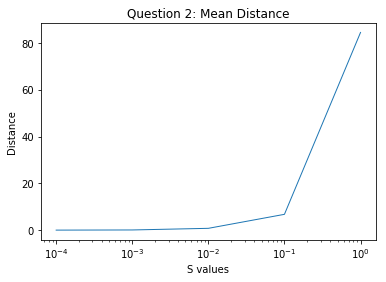

In [24]:
N = 100
steps = [0.0001,0.001,0.01,0.1,1]
final=[]
for s in steps:
    dist=[]
    for t in range(N):
        xsteps = np.random.normal(0,1,3600)
        ysteps = np.random.normal(0,1,3600)
        xnorm = np.random.normal(0,s,3600)
        ynorm = np.random.normal(0,s,3600)
        ax = xsteps + xnorm
        ay = ysteps + ynorm
        xreverse = sum(ax)-sum(xsteps)
        yreverse = sum(ay)-sum(ysteps)
        dist.append(pow(pow(xreverse,2) + pow(yreverse,2),0.5))
    final.append(np.mean(dist))

plt.xscale('log')
plt.plot(steps, final, linewidth =1)
plt.xlabel('S values')
plt.ylabel('Distance')
plt.title('Question 2: Mean Distance')
plt.show()

# Question 3a

exp (0.1/S) energy units and sd = S <br> distance d away from nest so it takes $d^2$ energy units to find the nest.

/Users/gyelgireddy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


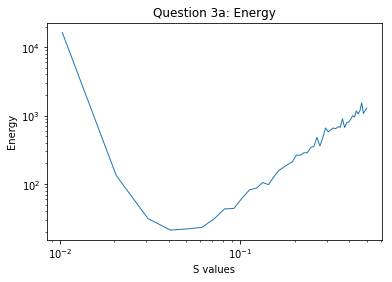

In [29]:
#steps = np.arange(0.001,1,1)
N=100
steps=np.linspace(0.0001,0.5,50)
final=[]
energy= [0]*len(steps)
for s in steps:
    dist=[]
    for i in range(N):
        xsteps=np.random.normal(0,1,3600)
        ysteps=np.random.normal(0,1,3600)
        xnorm=np.random.normal(0,s,3600)
        ynorm=np.random.normal(0,s,3600)
        ax=xsteps+xnorm
        ay=ysteps+ynorm
        xreverse=sum(ax)-sum(xsteps)
        yreverse=sum(ay)-sum(ysteps)
        dist.append((xreverse**2+yreverse**2)**0.5)
    final.append(np.mean(dist))
for i in range(len(final)):
    energy[i]=np.exp(0.1/steps[i])+final[i]**2

plt.xscale("log")
plt.yscale("log")
plt.plot(steps, energy, linewidth =1)
plt.xlabel('S values')
plt.ylabel('Energy')
plt.title('Question 3a: Energy')
plt.show()


# Question 3b

The evolutionary significance of the minimum of the plot in 3a is that there is a certain energy efficient way to find food. If s is small, then it takes more energy to remember steps and if s is large, then it is too far from its nest. So the evolutionary significance of the minimum of the plot in 3a is that its best when the ant is close to the nest and this saves energy.